**RAPPORT SUR L'ANALYSE DES RAISONS QUI POUSSERAIT CERTAINS EMPLOYES A QUITTER L'ENTREPRISE**

 1. **Introduction**

1.1 Problématique

L'objet de cette analyse est de chercher à comprendre, à partir d'une serie de données compilés par l'entreprise des raisons qui pousserait certains employés à démissionner.

1.2 Objet de l'étude

L'objet de l'étude est de chercher à comprendre les raisons des démissions de certains anciens employés et d'essayer de de donner quelques orientations pour maintenir le taux de démission au plus bas possible. Cela permettra notamment à l'entreprise à réduire les dépenses liés à la sollicitation des sociétés de placement ainsi que minimiser les perturbations organisationnels liés au remplacement de certains employés par de nouveaux.

1.3 Grandes Questions 

La grande question est la suivante : "Quels sont les facteurs qui contribuent au départ des employés en se basant sur des statistiques récapitulatives ?"

1.4 Apperçu du travail

Notre travail se divisera en deux grandes parties: 
* Dans un premier temps une analyse statistique(exploration et prédiction) de nos données qui nous permettrons de répondre à la question posée plus haut.
* Et pour finir, nous ferons une analyse de ces résultats et nous donnerons nos pistes de solutions ainsi que d'améliorations de l'environnement de travail.

2. **Données, Méthode et Analyse**

2.1 Données

Les données(qui seront egalement en annexe) nous ont été fournis par le service des ressources humaines. Elles regroupe notamment certzines statistiques de l'entreprise en lien avec leurs employés. Les données regroupent plusieurs caratéristiques qui sont les suivantes :

* left_company      :   L'employé a-t-il quitté l'entreprise? (Yes/No). Ce sera notre variable cible.
* department        :   Le service dans lequel travaille(travaillait) l'employé.
* job_level         :   le grade de l'employé.
* salary            :   Le salaire de l'employé.
* weekly_hours      :   Le nombre d'heures de service par semaine.
* business_travel   : Décrit la frequence de voyage de l'employé.
* yrs_at_company    : Le nombre d'années au sein de l'entreprise.
* previous_companies: Le nombre d'entreprise où l'employé a travaillé avant de rejoindre l'entreprise.
* job_satisfaction  : Une evaluation du niveau de satisfaction de l'employé au sein de l'entreprise.
* performance_rating: Une evaluation des performances de l'employé par rapport aux attentes.
* marital_status : L'etat civil de l'employé.
* miles_from_home  : La mesure de la distance entre le domicile et lieu de travail.



2.2 Méthodes

Nous utilserons principalement l'aspect descriptif de la Statistique :
* On étudiera les interractions entre notre variable cible et les autres variables. Cela incluera également les tests statistiques ainsi que différents graphiques.
* On va construire deux modèles prédictifs qui nous permettra d'identifier les caractéristiques qui ont le plus influencé l'employé quant à sa décision de rester ou de partir.On utilisera pour cela la régression logistique ainsi que les arbres de décisions.

2.3 Analyse

Importations des bibliothèques ainsi que les données.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,8)
from scipy import stats
import math
from scipy.stats import chi2_contingency
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import make_scorer,recall_score, classification_report
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [2]:
#Importations des données
df= pd.read_excel("C:/Users/HP/Downloads/Employee Data.xlsx")
y=df["left_company"]

# Séparer les variables catégorielles et numériques
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numeric_columns = df.select_dtypes(include=['number']).columns

df_categorical = df[categorical_columns]
df_categorical.drop('left_company', axis=1,inplace=True)
df_numeric = df[numeric_columns]


C:\Users\HP\AppData\Local\Temp\ipykernel_8148\3493071723.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical.drop('left_company', axis=1,inplace=True)


Analyse conjointe entre variable "left_company" et les autres variables variables
-On aura: 
* l'analyse entre "left_company" et toutes les variables numériques.

* l'analyse entre "left_company" et toutes les variables catégorielles.
        
             

2.3.1. Analyse entre "left_company" et toutes les variables numériques.

In [3]:
#tableau contenant différents aggrégats lors de l'analyse conjointe entre "left_company" et les autres variables numériques
#Pour la variable "salary"
print(df.groupby(y)["salary"].agg([np.mean, np.std, np.median, np.min, np.max]))


                      mean           std        median          amin  \
left_company                                                           
No            97151.010598  36875.440481  90648.947912  30559.081175   
Yes           76794.001859  37626.312709  69436.932900  30488.149701   

                       amax  
left_company                 
No            212134.700550  
Yes           205266.898625  


Text(0.5, 1.0, 'Fig-1')

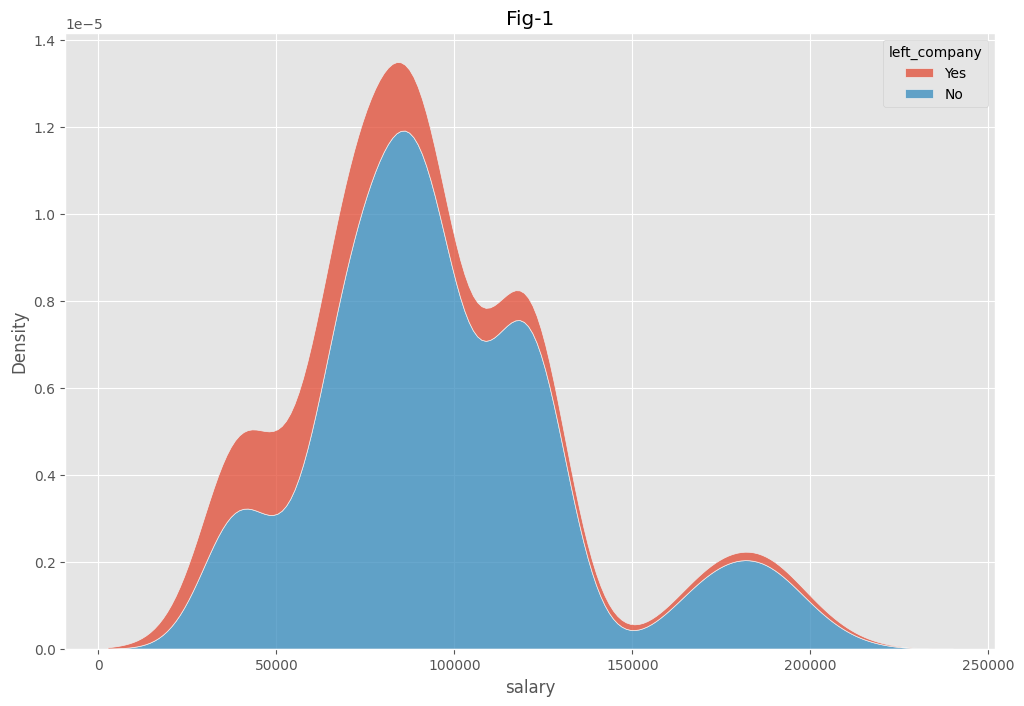

In [4]:
#Histogramme
sns.kdeplot(data = df, x='salary', hue = "left_company", multiple = "stack")
plt.title("Fig-1")

In [5]:
#tableau contenant différents aggrégats lors de l'analyse conjointe entre "left_company" et les autres variables numériques
#Pour la variable "weekly_hours"
print(df.groupby(y)["weekly_hours"].agg([np.mean, np.std, np.median, np.min, np.max]))


                   mean       std  median  amin  amax
left_company                                         
No            48.351913  3.046087    48.0    40    58
Yes           58.659459  2.953945    58.0    51    66


Text(0.5, 1.0, 'Fig-2')

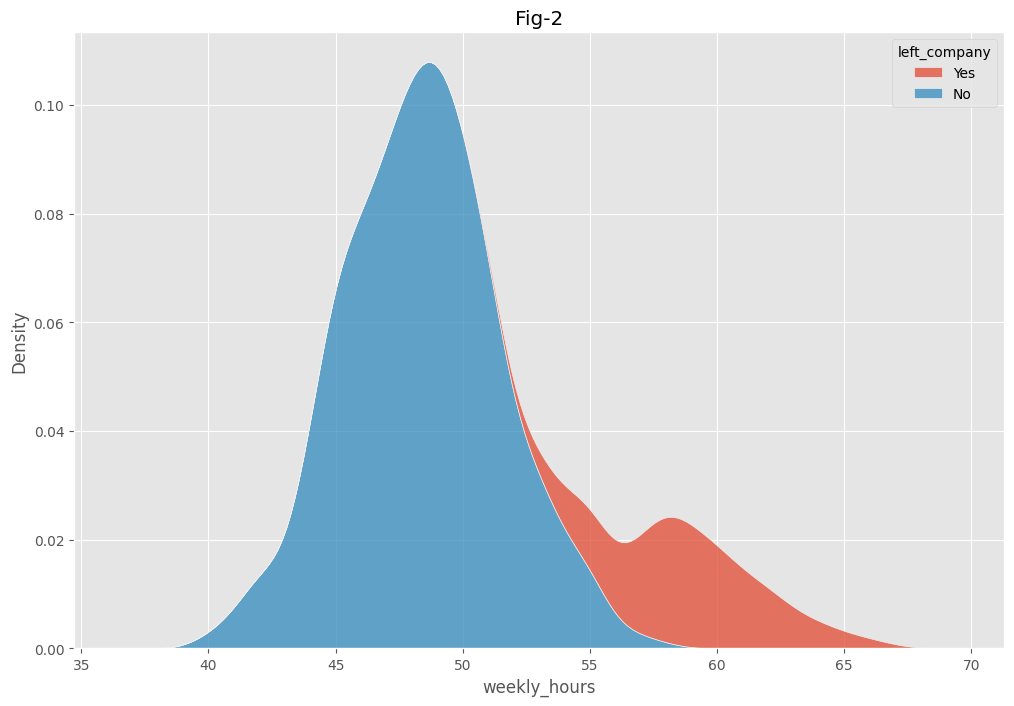

In [6]:
#Histogramme
sns.kdeplot(data = df, x='weekly_hours', hue = "left_company", multiple = "stack")
plt.title("Fig-2")

In [7]:
#tableau contenant différents aggrégats lors de l'analyse conjointe entre "left_company" et les autres variables numériques
#Pour la variable "yrs_at_company"
print(df.groupby(y)["yrs_at_company"].agg([np.mean, np.std, np.median, np.min, np.max]))


                  mean       std  median  amin  amax
left_company                                        
No            7.457923  6.283347     6.0     0    37
Yes           5.216216  5.976108     3.0     0    40


Text(0.5, 1.0, 'Fig-3')

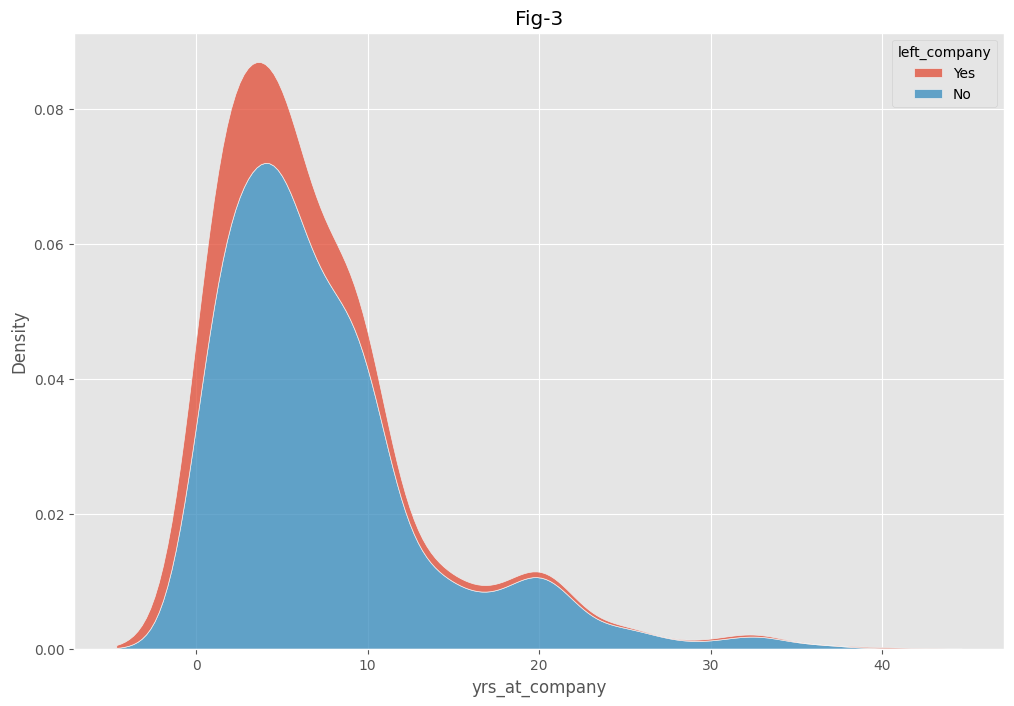

In [8]:
#Histogramme
sns.kdeplot(data = df, x='yrs_at_company', hue = "left_company", multiple = "stack")
plt.title("Fig-3")

In [9]:
#tableau contenant différents aggrégats lors de l'analyse conjointe entre "left_company" et les autres variables numériques
#Pour la variable "previous_companies"
print(df.groupby(y)["previous_companies"].agg([np.mean, np.std, np.median, np.min, np.max]))


                  mean       std  median  amin  amax
left_company                                        
No            2.965027  1.452712     3.0     1     7
Yes           4.718919  1.397560     5.0     1     7


Text(0.5, 1.0, 'Fig-4')

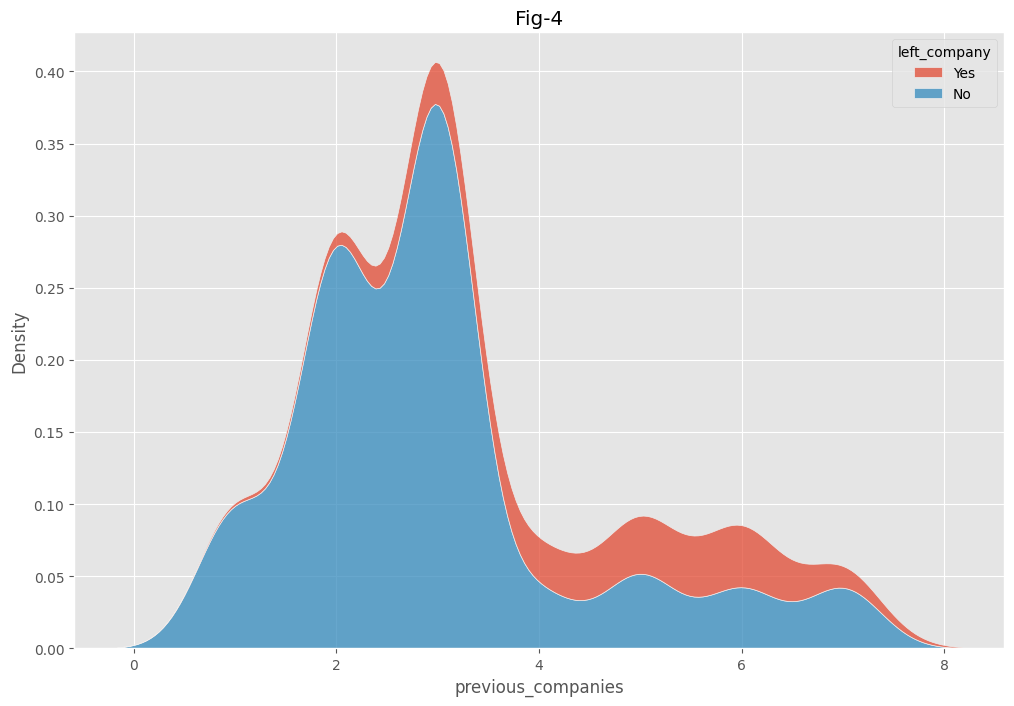

In [10]:
#Histogramme
sns.kdeplot(data = df, x='previous_companies', hue = "left_company", multiple = "stack")
plt.title("Fig-4")

In [11]:
#tableau contenant différents aggrégats lors de l'analyse conjointe entre "left_company" et les autres variables numériques
#Pour la variable "miles_from_home"
print(df.groupby(y)["miles_from_home"].agg([np.mean, np.std, np.median, np.min, np.max]))


                   mean       std  median  amin  amax
left_company                                         
No             8.778142  7.963398     7.0     1    29
Yes           10.291892  8.529437     8.0     1    29


Text(0.5, 1.0, 'Fig-5')

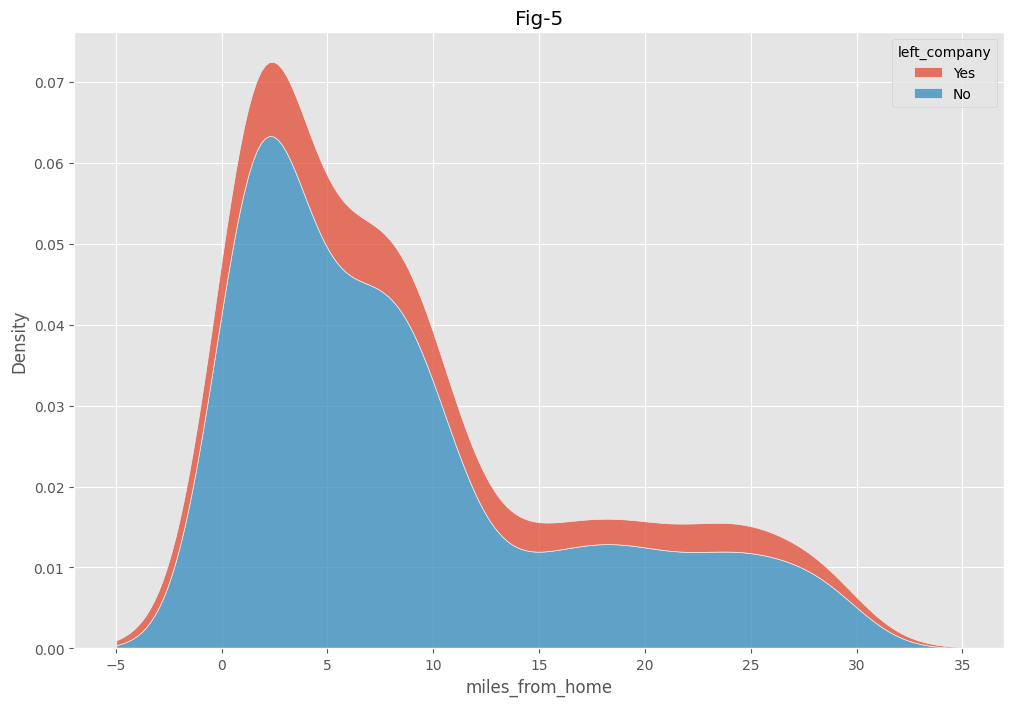

In [12]:
#Histogramme
sns.kdeplot(data = df, x='miles_from_home', hue = "left_company", multiple = "stack")
plt.title("Fig-5")

Le test idéai aurait été ici de tester l'hypothèse que les deux échantillons ne sont pas indépendants du fait que tous les individus viennent de la même entreprise. Mais comptes tenu du fait que pour effectuer le test T de Student apparié on a besoin de deux échantillons de même taille, ce qui n'est pas le cas ici d'où le choix par défaut de poser comme hypothèse l'indépendance entre les deux échantillons.

In [13]:
#Tests d'hypothèses pour tester que les deux groupes associées à chacune des modalités de la variable cible pour tester l'hypothèse selon laquelle les moyennes des deux groupes sont significativement différente


In [14]:
for i in df_numeric.columns:
    # Séparation des données en deux groupes
    salaries_left = df[df['left_company'] == 'Yes'][i]
    salaries_stay = df[df['left_company'] == 'No'][i]

# Le test t de Student
    t_stat, p_value = stats.ttest_ind (salaries_left, salaries_stay,alternative = "less")

# Affichage les résultats pour chaque variable
    print(f"\t{i}")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")



	salary
T-statistic: -6.824721453640512
P-value: 7.269436096839405e-12
	weekly_hours
T-statistic: 42.18830937343199
P-value: 1.0
	yrs_at_company
T-statistic: -4.461569130195931
P-value: 4.486780577006438e-06
	yrs_since_promotion
T-statistic: -1.0155578379671337
P-value: 0.15503185744787928
	previous_companies
T-statistic: 15.07130502217663
P-value: 1.0
	miles_from_home
T-statistic: 2.3295059781892204
P-value: 0.9899935500649251


In [15]:
#Test de normalité
for i in df_numeric.columns:
    print(stats.shapiro(df_numeric[i]))

ShapiroResult(statistic=0.9312977194786072, pvalue=4.613281292926547e-22)
ShapiroResult(statistic=0.937618613243103, pvalue=4.5824287283531874e-21)
ShapiroResult(statistic=0.8358885049819946, pvalue=3.533653274133291e-32)
ShapiroResult(statistic=0.7041963934898376, pvalue=3.615279973034812e-40)
ShapiroResult(statistic=0.8748016953468323, pvalue=8.101219681008316e-29)
ShapiroResult(statistic=0.854648768901825, pvalue=1.201065208574143e-30)


On constate que bien que les hypothèses de normalités ne sont pas vérifiées, le test T est assez robuste donc nous pouvons considérer le résultat de ces tests

2.3.2 Analyse conjointe entre "left_company" et les variables categorielles

* left_company and department

In [16]:
#Affichage du tableau de contingence

print('Le tableau de contingence entre la variable "left_company" et "department"')
pd.crosstab(df["left_company"], df_categorical["department"])




Le tableau de contingence entre la variable "left_company" et "department"


department,Finance and Operations,IT and Analytics,Marketing,Product Development,Research,Sales
left_company,,,,,,
No,66,269,134,98,214,134
Yes,24,23,35,41,8,54


array([<Axes: ylabel='Finance and Operations'>,
       <Axes: ylabel='IT and Analytics'>, <Axes: ylabel='Marketing'>,
       <Axes: ylabel='Product Development'>, <Axes: ylabel='Research'>,
       <Axes: ylabel='Sales'>], dtype=object)

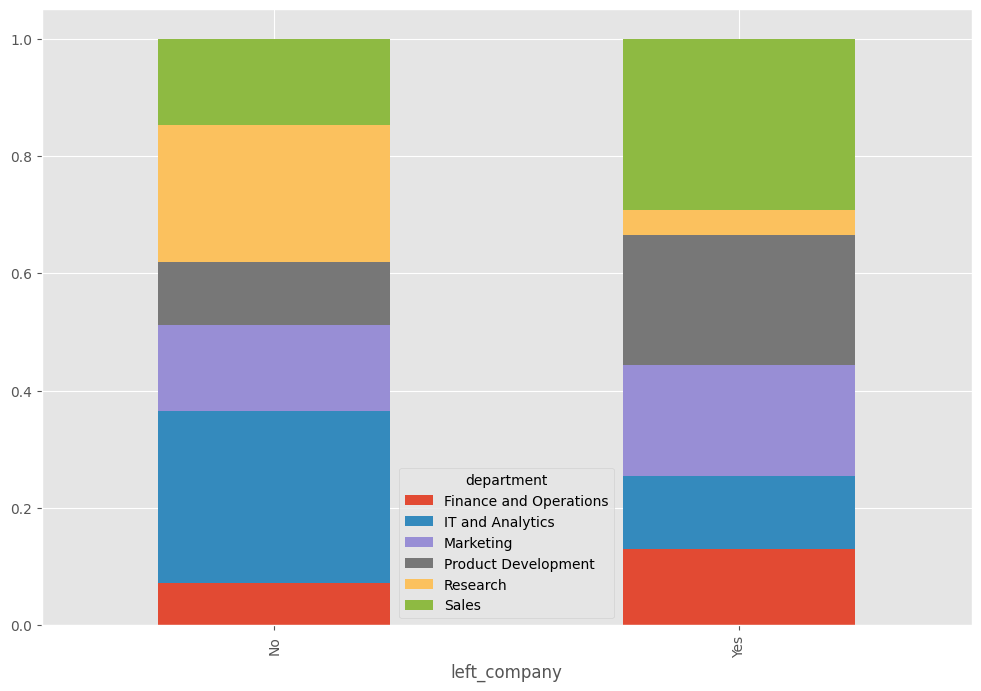

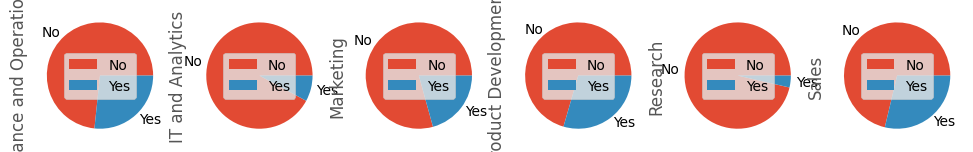

In [17]:
#Graphique 
barchart = pd.crosstab(df["left_company"], df_categorical["department"], normalize = "index")
barchart.plot.bar(stacked = True)

pie_chart = pd.crosstab(df["left_company"], df_categorical["department"])
pie_chart.plot.pie(subplots = True, figsize = (12, 6))


In [18]:
tab=pd.crosstab(df["left_company"], df_categorical["department"])

#Test du Chi deux d'indépendance
# Effectuer le test du chi-deux
chi2, p, dof,expected = chi2_contingency(tab)

# Afficher les résultats
print(f"Chi-deux: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print('le V de cramer est ',math.sqrt(chi2/1100))


Chi-deux: 87.48584101106334
P-value: 2.2658025167168768e-17
Degrees of Freedom: 5
le V de cramer est  0.2820152172088065


Chi-deux>valeur critique

* left_company and business_travel

In [19]:
#Affichage du tableau de contingence
print('Le tableau de contingence entre la variable "left_company" et "business_travel"')
pd.crosstab(df["left_company"], df_categorical["business_travel"])


Le tableau de contingence entre la variable "left_company" et "business_travel"


business_travel,Frequently,Rarely
left_company,,
No,160,657
Yes,54,120


array([<Axes: ylabel='Frequently'>, <Axes: ylabel='Rarely'>], dtype=object)

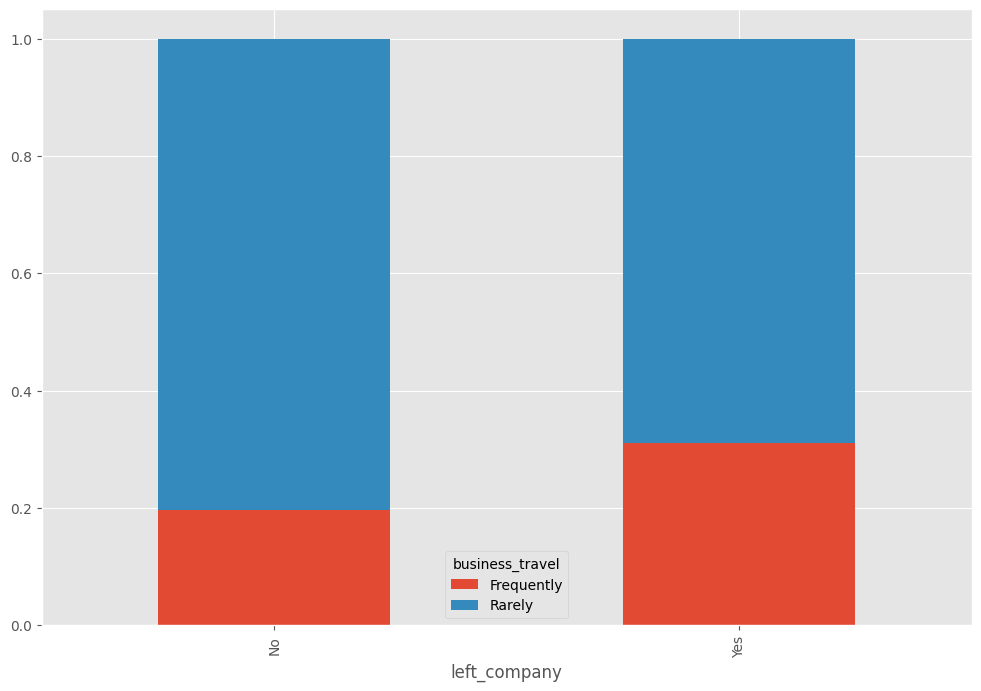

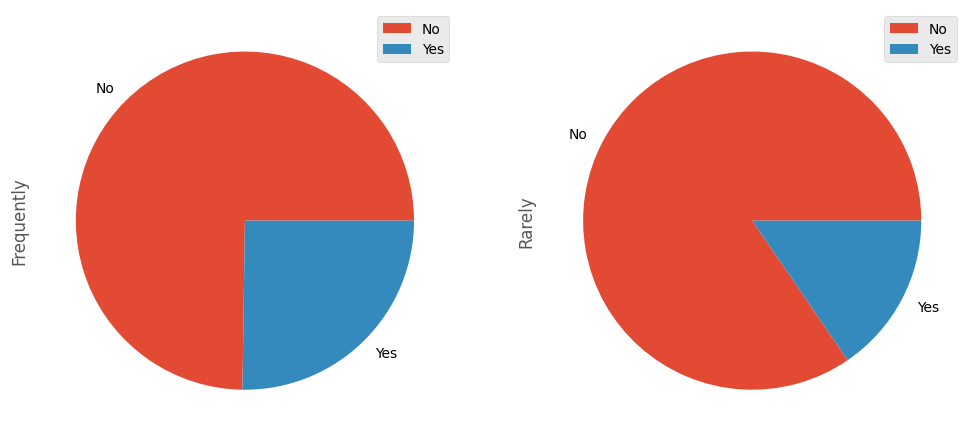

In [20]:
#Graphique 
barchart = pd.crosstab(df["left_company"], df_categorical["business_travel"], normalize = "index")
barchart.plot.bar(stacked = True)

pie_chart = pd.crosstab(df["left_company"], df_categorical["business_travel"])
pie_chart.plot.pie(subplots = True, figsize = (12, 6))


In [21]:
tab=pd.crosstab(df["left_company"], df_categorical["business_travel"])


#Test du Chi deux d'indépendance
# Effectuer le test du chi-deux
chi2, p, dof,expected = chi2_contingency(tab)

# Afficher les résultats
print(f"Chi-deux: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print('le V de cramer est ',math.sqrt(chi2/1100))


Chi-deux: 10.442852732307951
P-value: 0.0012312495900342483
Degrees of Freedom: 1
le V de cramer est  0.09743460619264759


La statistique du Chi-deux(10.44) > 3.84, on rejette donc l'hypothèse d'indépendance. Et en observant le V de Cramer, on  constate que cette relation n'est pas tres forte. Ce qui va également dans le sens de la P-value associé à la statistique du Chi-2, d'après la P-value le rejet n'est pas très significatif.

* left_company and job_satisfaction

In [22]:
#Affichage du tableau de contingence
print('Le tableau de contingence entre la variable "left_company" et "job_satisfaction"')
pd.crosstab(df["left_company"], df_categorical["job_satisfaction"])


Le tableau de contingence entre la variable "left_company" et "job_satisfaction"


job_satisfaction,High,Low,Medium,Very High
left_company,,,,
No,268,165,173,309
Yes,63,50,33,39


array([<Axes: ylabel='High'>, <Axes: ylabel='Low'>,
       <Axes: ylabel='Medium'>, <Axes: ylabel='Very High'>], dtype=object)

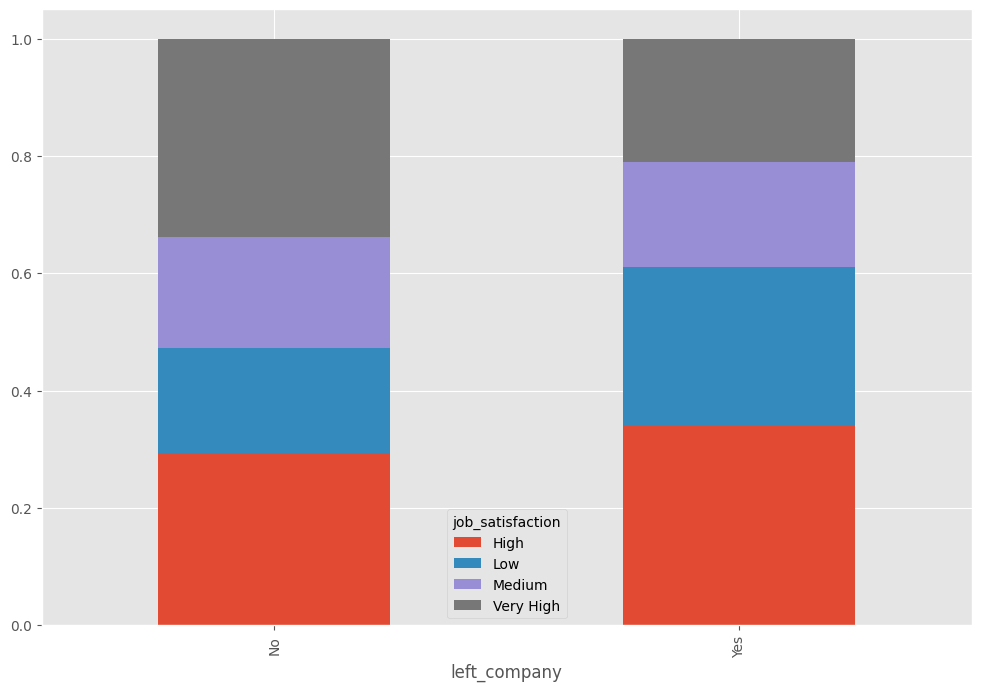

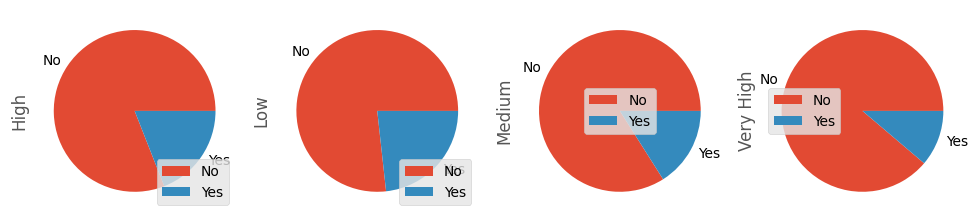

In [23]:
#Graphique 
barchart = pd.crosstab(df["left_company"], df_categorical["job_satisfaction"], normalize = "index")
barchart.plot.bar(stacked = True)

pie_chart = pd.crosstab(df["left_company"], df_categorical["job_satisfaction"])
pie_chart.plot.pie(subplots = True, figsize = (12, 6))


In [24]:
tab=pd.crosstab(df["left_company"], df_categorical["job_satisfaction"])


#Test du Chi deux d'indépendance
# Effectuer le test du chi-deux
chi2, p, dof, expected = chi2_contingency(tab)

# Afficher les résultats
print(f"Chi-deux: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print('le V de cramer est ',math.sqrt(chi2/1100))

Chi-deux: 15.456438075945865
P-value: 0.001465359558838693
Degrees of Freedom: 3
le V de cramer est  0.1185382104714297


Ici également on rejette donc l'hypothèse d'indépendance du fait que la valeur critique vaut 11.07. Et en observant le V de Cramer, on  constate que cette relation n'est pas tres forte. On a à nouveau un rejet qui n'est pas très significatif

* left_company and ferformance_rating

In [25]:
#Affichage du tableau de contingence
print('Le tableau de contingence entre la variable "left_company" et "performance_rating"')
pd.crosstab(df["left_company"], df_categorical["performance_rating"])

Le tableau de contingence entre la variable "left_company" et "performance_rating"


performance_rating,Exceeds Expectations,Exceptional,Meets Expectations,Minimally Effective,Not Effective
left_company,,,,,
No,337,202,317,48,11
Yes,29,2,79,62,13


array([<Axes: ylabel='Exceeds Expectations'>,
       <Axes: ylabel='Exceptional'>, <Axes: ylabel='Meets Expectations'>,
       <Axes: ylabel='Minimally Effective'>,
       <Axes: ylabel='Not Effective'>], dtype=object)

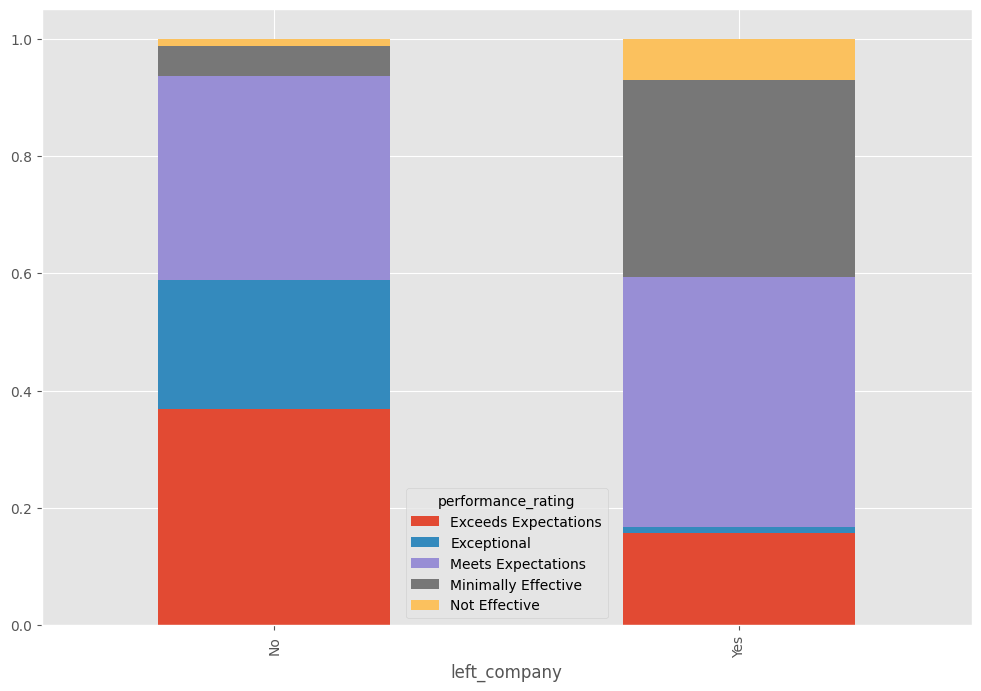

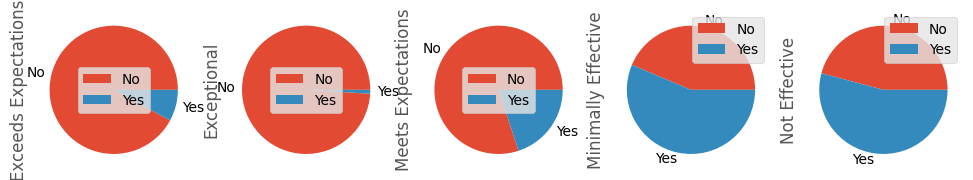

In [26]:
#Graphique 
barchart = pd.crosstab(df["left_company"], df_categorical["performance_rating"], normalize = "index")
barchart.plot.bar(stacked = True)

t = pd.crosstab(df["left_company"], df_categorical["performance_rating"])
t.plot.pie(subplots = True, figsize = (12, 6))


In [27]:
tab=pd.crosstab(df["left_company"], df_categorical["performance_rating"])


#Test du Chi deux d'indépendance
# Effectuer le test du chi-deux
chi2, p, dof, expected = chi2_contingency(tab)

# Afficher les résultats
print(f"Chi-deux: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print('le V de cramer est ',math.sqrt(chi2/1100))
    

Chi-deux: 206.94561849264096
P-value: 1.205960797274806e-43
Degrees of Freedom: 4
le V de cramer est  0.43374229727783686


Ici également la statistique du Chi-2 nous pousse à rejeter l'hypothèse d'indépendance tout en montrant l'intensité de la relation entre les deux variables est assez significative.

* left_company and marital_status

In [28]:
#Affichage du tableau de contingence
print('Le tableau de contingence entre la variable "left_company" et "marital_status"')
pd.crosstab(df["left_company"], df_categorical["marital_status"])

Le tableau de contingence entre la variable "left_company" et "marital_status"


marital_status,Divorced,Married,Single
left_company,,,
No,226,421,268
Yes,23,62,100


array([<Axes: ylabel='Divorced'>, <Axes: ylabel='Married'>,
       <Axes: ylabel='Single'>], dtype=object)

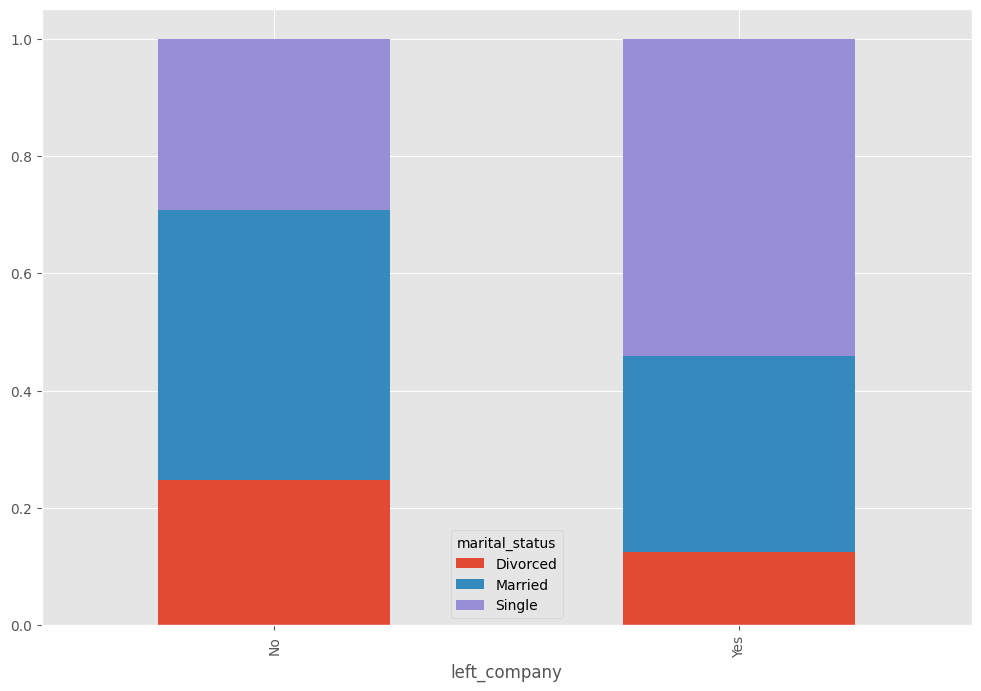

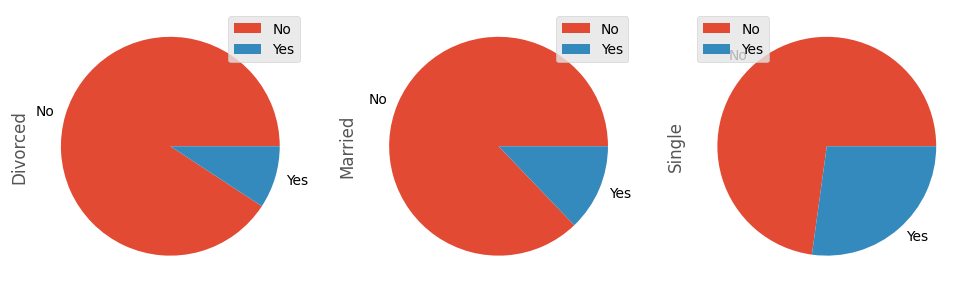

In [29]:
#Graphique 
barchart = pd.crosstab(df["left_company"], df_categorical["marital_status"], normalize = "index")
barchart.plot.bar(stacked = True)

t = pd.crosstab(df["left_company"], df_categorical["marital_status"])
t.plot.pie(subplots = True, figsize = (12, 6))


In [30]:
tab=pd.crosstab(df["left_company"], df_categorical["marital_status"])


#Test du Chi deux d'indépendance
# Effectuer le test du chi-deux
chi2, p, dof, expected = chi2_contingency(tab)

# Afficher les résultats
print(f"Chi-deux: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print('le V de cramer est ',math.sqrt(chi2/1100))

    

Chi-deux: 43.91359523391573
P-value: 2.9126208540467275e-10
Degrees of Freedom: 2
le V de cramer est  0.19980352902952106


On rejette donc l'hypothèse d'indépendance(parce que 43.97>5.99). Et en observant le V de Cramer, on  constate que cette relation n'est pas tres forte.

2.3.4. Modèles de discrimination

2.3.4.1 Les arbres de décision

* Evaluation des hyperparamètres en utilisant la validation croisée

In [31]:
y= df['left_company']
y = y.replace({'Yes': 1, 'No': 0})
df.drop('left_company',axis=1, inplace=True)

data_encoded = pd.get_dummies(df_categorical).astype(int)
#Ensuite on supprime les colonnes associées aux modalités les plus nombreuses que l'on considérera comme modalité de reférence

X=pd.concat([df_numeric,data_encoded],axis=1)

""""
columns_to_drop = ["department_It and Analytics","job_level_Senior Manager","business_travel_Rarely","performance_rating_Meets Expectations","marital_status_Married"]
X.drop(columns=columns_to_drop,axis=1,inplace=True)
"""
#Decision tree

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.4,random_state=17)


# Définir le modèle d'arbre de décision
dt = DecisionTreeClassifier(random_state=42)

# Définir la grille des hyperparamètres
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None,4 , 8, 10, 15]
}

# Définir la métrique de scoring
scoring = {
    'accuracy': 'accuracy',
    'recall_macro': make_scorer(recall_score, average='macro')
}

# Utilisation GridSearchCV pour effectuer la validation croisée à 5 plis
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring=scoring, refit='recall_macro', n_jobs=-1, verbose=1)

# Entraîner le modèle
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Best Hyperparameters:", grid_search.best_params_)

# Évaluer le modèle sur l'ensemble de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Afficher le rapport de classification
print(classification_report(y_test, y_pred))



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'splitter': 'random'}
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       363
           1       0.91      0.91      0.91        77

    accuracy                           0.97       440
   macro avg       0.94      0.94      0.94       440
weighted avg       0.97      0.97      0.97       440



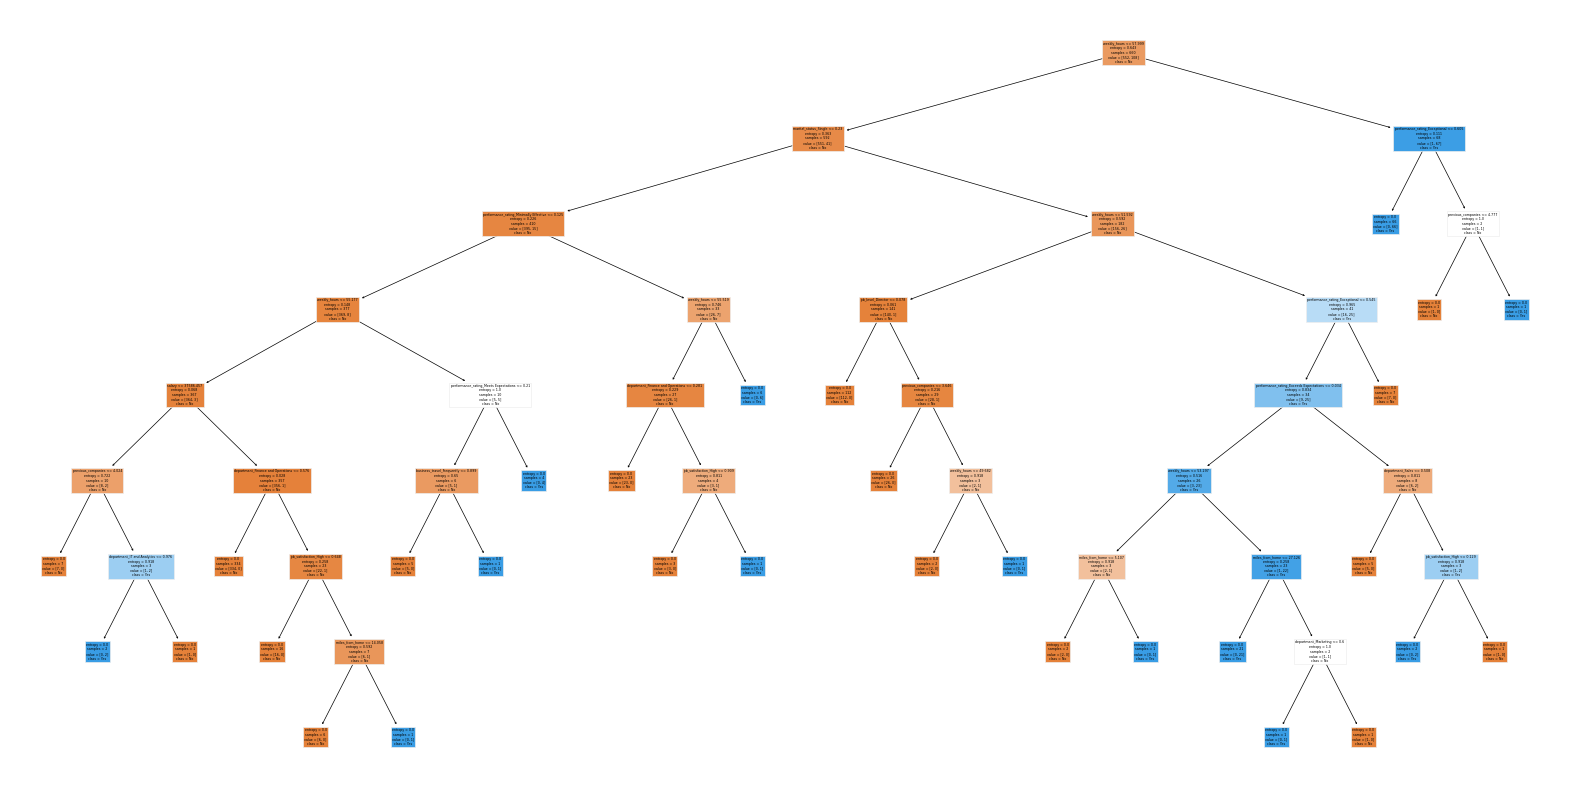

In [32]:
# Visualiser l'arbre de décision
plt.figure(figsize=(20,10))  # Ajuster la taille de la figure pour une meilleure visibilité
tree.plot_tree(best_model, filled=True, feature_names=X.columns.tolist(), class_names=['No', 'Yes'])
plt.show()

On observe que le meilleur modèle dont les hyperparamètres ont été trouvé en utilisant la validation croisé donne de très bonne performances même dans la classe minoritaire. Mais compte tenu du fait que le but de notre étude est essentiellement explicatif, avoir un arbre de décision aussi complexe n'est pas nécéssaire du fait que l'on a du mal à correctement interprêter l'arbre. Nous avons fait le choix personnel de ne retenir que le molèle d'arbre dont les hyperparamètres sont les suivants : 
- criterion="gini"
- splitter="best"
- max_depth=3

In [33]:
#On ajuste Desormais notre modele d'arbre de decision
model = DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=3)  # La profondeur de l'arbre est reglée à 
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)
print(classification_report(y_pred_train,y_train))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       551
           1       0.93      0.92      0.92       109

    accuracy                           0.97       660
   macro avg       0.95      0.95      0.95       660
weighted avg       0.97      0.97      0.97       660

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       363
           1       0.88      0.87      0.88        77

    accuracy                           0.96       440
   macro avg       0.93      0.92      0.92       440
weighted avg       0.96      0.96      0.96       440



On observe pour ce modèle que le rappel pour la classe minoritaire dans les données est très proche(le delta n'est que de 5%), on retiendra celui-ci pour la suite de notre travail. Son graphique associé est le suivant : 

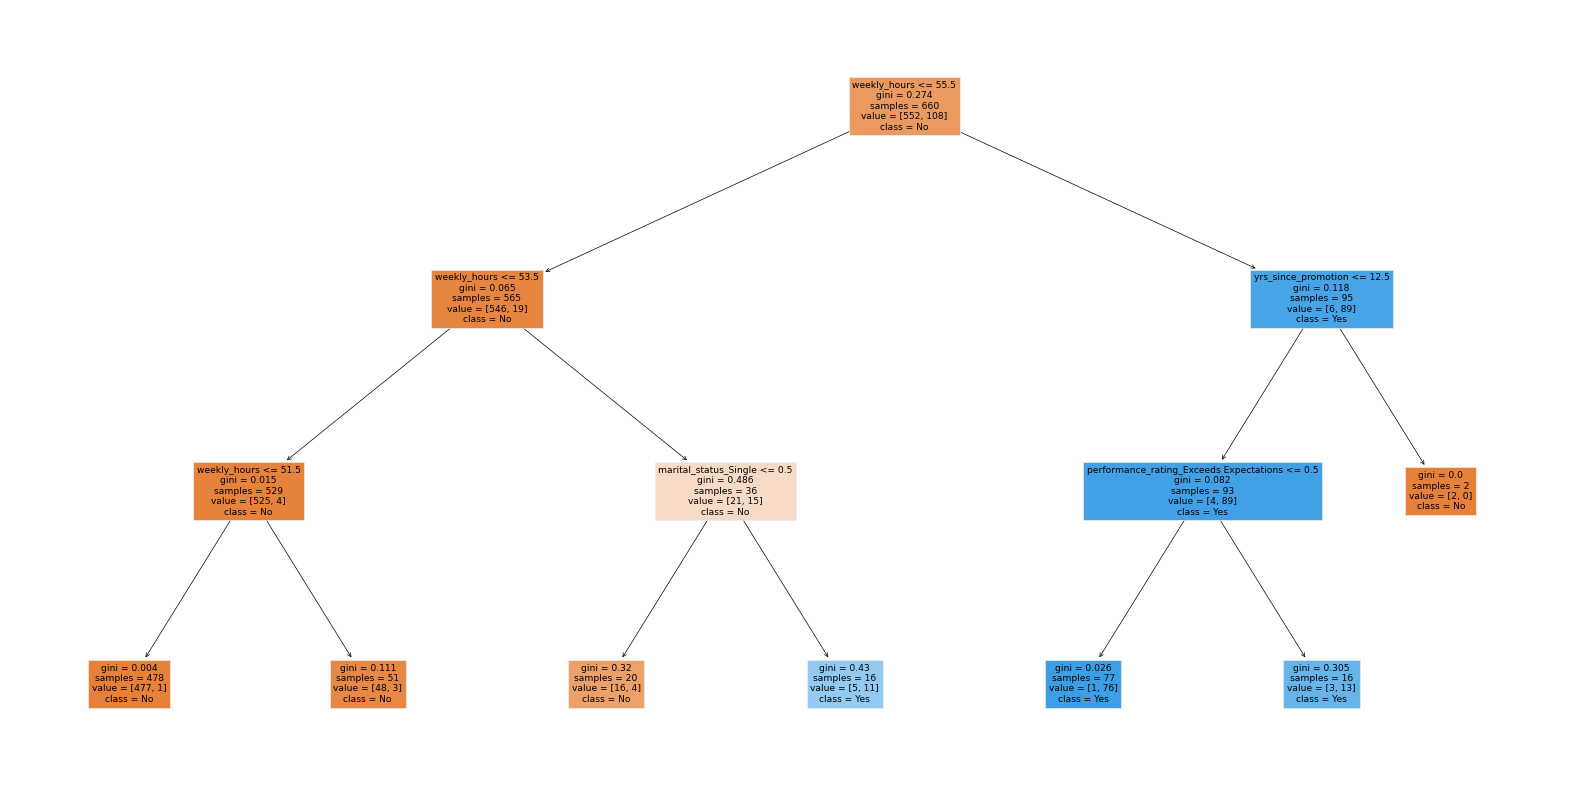

In [34]:
# Visualiser l'arbre de décision
plt.figure(figsize=(20,10))  # Ajuster la taille de la figure pour une meilleure visibilité
tree.plot_tree(model, filled=True, feature_names=X.columns.tolist(), class_names=['No', 'Yes'])
plt.show()

2.3.4.2 La régression Logistique

* Evaluation des hyperparamètres

In [35]:

logisticCV=LogisticRegression()

# Définir la grille des hyperparamètres
param_grid = {
    'penalty': ['l1', 'l2','elasticnet'],
    'solver': ['lbfgs', 'newton-cg','newton-cholesky','sag','saga'],
    'class_weight': [None,'balanced'],
    'max_iter' : [10, 100, 1000]
}

# Définir la métrique de scoring
scoring = {
    'accuracy': 'accuracy',
    'recall_macro': make_scorer(recall_score, average='macro')
}

# Utiliser GridSearchCV pour effectuer la validation croisée à 5 plis
grid_search = GridSearchCV(estimator=logisticCV, param_grid=param_grid, cv=5, scoring=scoring, refit='recall_macro', n_jobs=-1, verbose=1)

# Entraîner le modèle
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Best Hyperparameters:", grid_search.best_params_)

# Évaluer le modèle sur l'ensemble de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Afficher le rapport de classification
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 90 candidates, totalling 450 fits


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
270 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

Best Hyperparameters: {'class_weight': 'balanced', 'max_iter': 10, 'penalty': 'l2', 'solver': 'newton-cholesky'}
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       363
           1       0.93      0.97      0.95        77

    accuracy                           0.98       440
   macro avg       0.96      0.98      0.97       440
weighted avg       0.98      0.98      0.98       440



In [36]:

logistic_model=LogisticRegression(penalty='l2',solver='newton-cholesky',class_weight='balanced',max_iter=100)
logistic_model.fit(X_train,y_train)
y_pred=logistic_model.predict(X_test)
y_pred_train=logistic_model.predict(X_train)
print(classification_report(y_pred_train,y_train))
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       543
           1       0.99      0.91      0.95       117

    accuracy                           0.98       660
   macro avg       0.99      0.96      0.97       660
weighted avg       0.98      0.98      0.98       660

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       359
           1       0.97      0.93      0.95        81

    accuracy                           0.98       440
   macro avg       0.98      0.96      0.97       440
weighted avg       0.98      0.98      0.98       440



Identification de la variable la plus discriminante

Nos données n'ont pas été standardisées à cause de la présence de plusieurs variables binaires. L'utilisation de la standardisation aurait changé la distributon de ces variables, et cela rend l'indetification de la variable la plus discriminante difficile si on décide de n'observer que les odd-ratios du fait que toutes nos données n'ont pas la même echelle. Ce qui fera qu'un odd-ratio plus faible qu'un autre ne voudra pas forcément dire que la dernière variable est plus discriminante que l'autre. A la place nous utiliserons le rapport de vraisemblance pour identifier cette variable. En effet, lorsqu'une variable très discriminante est exclu du modèle, cela a pour effet de faire chuter sensiblement la log-vraisemblance du modèle. D'où, il nous suffura de trouver la variable qui, lorsqu'elle est exclu du modèle cause une très grande baisse de la log-vraisemblance.

In [37]:
# Calculer la vraisemblance du modèle complet

log_likelihood_full = -log_loss(y_train, y_pred_train, normalize=False)

# Initialiser un dictionnaire pour stocker les vraisemblances sans chaque variable
log_likelihoods = {}

# Calculer la vraisemblance sans chaque variable
for i, col in enumerate(X_train.columns):
    # Enlever la variable i
    X_train_reduced = np.delete(X_train, i, axis=1)
    
    
    # Entraîner le modèle réduit
    log_reg_reduced = LogisticRegression(random_state=42, max_iter=10000)
    log_reg_reduced.fit(X_train_reduced, y_train)
    
    # Calculer la vraisemblance du modèle réduit
    y_pred_reduced = log_reg_reduced.predict_proba(X_train_reduced)
    log_likelihood_reduced = -log_loss(y_train, y_pred_reduced, normalize=False)
    
    # Stocker la vraisemblance dans le dictionnaire
    log_likelihoods[col] = log_likelihood_reduced/log_likelihood_full

# Afficher les vraisemblances
print("Log-Likelihood of Full Model: ", log_likelihood_full)
for col, ll in log_likelihoods.items():
    print(f"Log-Likelihood without {col}: {ll}")


Log-Likelihood of Full Model:  -396.48018728028876
Log-Likelihood without salary: 0.0687183307005146
Log-Likelihood without weekly_hours: 0.4383185544517539
Log-Likelihood without yrs_at_company: 0.3757497049376046
Log-Likelihood without yrs_since_promotion: 0.5797101873308544
Log-Likelihood without previous_companies: 0.589428945677675
Log-Likelihood without miles_from_home: 0.49999906806059435
Log-Likelihood without department_Finance and Operations: 0.49718663605862
Log-Likelihood without department_IT and Analytics: 0.5015250705314779
Log-Likelihood without department_Marketing: 0.3620687902950004
Log-Likelihood without department_Product Development: 0.4976757829761655
Log-Likelihood without department_Research: 0.3724329890610728
Log-Likelihood without department_Sales: 0.5717749798678031
Log-Likelihood without job_level_Associate: 0.4993052245430989
Log-Likelihood without job_level_Director: 0.4987845231809656
Log-Likelihood without job_level_Manager: 0.49549998334827694
Log-Lik

D'où la variable la plus discriminante pour notre modèle de régression logistique est la variable la plus discriminante est la variable "salary".

3. **Discussion et analyse**

En observant la première partie de notre analyse descriptive(description des variables numérique), on fait principalement les constats suivants :
- La moitié des employés qui partent ont un salaire inférieur à 69 436 $ et le graphique de la distributon des salaires le montre assez bien.
- Ceux qui partent ont en moyenne 10 heures de travail en plus que ceux qui reste. Le graphique associé montre clairement que la queue de distribution des heures de services est beaucoup plus disymétrique à droite.
- La moitié de ceux qui partent ont passé en moyenne 3 ans au sein de l'entreprise contre 6 pour les autres.
- Ceux qui restent ont en moyenne deux ans de plus d'ancienneté au sein de la société, donc ils passent en moyenne 7 ans au sein de l'entreprise contre 5 pour ceux qui partent.
- Il n'y a pas de réel différence entre les deux groupe pour ce qui est du nombre d'années passées depuis la dernière promotion au sein de l'entreprise.
- Ceux qui partent ont connu en moyenne deux entreprise de plus avant d'être engagé au sein de la société. Ce qui peut expliquer le fait qu'ils appréhende moins le fait d'être à nouveau à la recherche d'un nouvel emploi.



Dans la seconde partie de l'analyse descriptive, on a constaté une liaison entre les variables catégorielles et la variable cible et ce, bien que cette liaison dans la grande majorité n'est pas très significative. On observe aussi qu'un très grand nombre de ceux qui ont quitté l'entreprise, leurs performances étaient bien en dessous des attentes.

Et pour ce qui est des modèles explicatifs, on a remarqué que le critère le plus discriminant pour le modèle d'arbre de  décicion était le fait que 82% de ceux qui ont quitté l'entreprise avaient plus de 55 heures de travail par semaine. Alors que pour le modèle de regression logistique, le critère le plus discriminant était le salaire des employés. Ces deux constats match plutot bien avec les analyses exploratoires faites en ammont.

4. Implications pour l'entreprise
**Réévaluation des Salaires**:

- Observation : Les employés qui quittent l'entreprise ont tendance à avoir des salaires plus bas que ceux qui restent.
- Action : L'entreprise devrait réévaluer sa politique salariale pour s'assurer que les employés sont rémunérés de manière compétitive par rapport au marché. Une augmentation des salaires pourrait réduire le taux de départ, en particulier pour les employés qui se sentent sous-payés.
**Gestion des Heures de Travail**:

- Observation : Les employés qui quittent travaillent en moyenne 10 heures de plus par semaine que ceux qui restent.
- Action : L'entreprise pourrait mettre en place des politiques visant à limiter le nombre d'heures supplémentaires et promouvoir un meilleur équilibre entre vie professionnelle et vie personnelle. Cela pourrait inclure des initiatives comme le télétravail, des horaires flexibles ou des programmes de bien-être.
**Développement des Carrières et Promotions**:

- Observation : Il n'y a pas de différence significative dans le nombre d'années depuis la dernière promotion entre les deux groupes.
- Action : L'entreprise devrait examiner ses processus de promotion pour s'assurer qu'ils sont perçus comme justes et transparents. Des opportunités claires de développement de carrière et de progression pourraient augmenter la satisfaction des employés et réduire le taux de départ.
**Tenure et Expérience Précédente**:

- Observation : Ceux qui quittent ont tendance à avoir travaillé pour plus d'entreprises avant de rejoindre l'actuelle.
- Action : L'entreprise pourrait offrir des programmes d'intégration et de mentorat pour les nouveaux employés afin de les aider à s'adapter et à se sentir plus connectés à l'entreprise.
**Performance et Satisfaction au Travail**:

- Observation : Un grand nombre de ceux qui quittent avaient des performances en dessous des attentes.
- Action : Mettre en place des programmes de formation et de développement pour améliorer les performances des employés. De plus, des enquêtes régulières sur la satisfaction des employés peuvent aider à identifier et résoudre les problèmes avant qu'ils ne conduisent à des départs.
**Analyse Continue et Ajustements**:

- Observation : Les modèles explicatifs montrent des facteurs différents influençant le départ des employés.
- Action : Continuer à surveiller et analyser les données des employés pour identifier de nouvelles tendances et ajuster les politiques en conséquence. L'utilisation de modèles prédictifs peut aider à identifier les employés à risque et à intervenir de manière proactive

5. **ANNEXE** 


**Graphiques**



Distribution des salaires


![Fig_1](Fig_1.png)

Heures de services

![Fig_2](Fig_2.png)

Le nombre d'années au sein de la compagnie

![Fig_3](Fig_3.png)

Le nombre d'entreprise

![Fig_4](Fig_4.png)

La distance entre le bureau et le domicile

![Fig_5](Fig_5.png)

Les départements

![Fig_6](Fig_6.png)

Les déplacements

![Fig_7](Fig_7.png)

Le niveau de satisfaction au sein de l'entreprise

![Fig_8](Fig_8.png)

Les attentes

![Fig_9](Fig_9.png)

L'état civil

![Fig_10](Fig_10.png)

Premier modèle d'arbre

![descision_tree_1](decision_tree_1.png)

Modèle d'arbre réduit

![descision_tree_2](decision_tree_2.png)